In [1]:
#   Deep Learning CNN Overview Pytorch

In [2]:
# Flatenning an image means to remove some 2D information 

In [3]:
# ANN with MNIST Dataset
import torch 
import torch.nn as nn
import torch.nn.functional as F



In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [5]:

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
# MNIST IMAGE M --> Tensors


In [7]:
transform = transforms.ToTensor()

train_data = datasets.MNIST( root = '../Data' , train = True , downlaod = True , transform = transform)


In [8]:
train_data = datasets.MNIST( root = "../Data" , train = True , download = True , transform = transform
                            )


In [9]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)


In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [13]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [14]:
train_data[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
train_data[39]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [18]:
image , label = train_data[0]


In [19]:
image.shape

torch.Size([1, 28, 28])

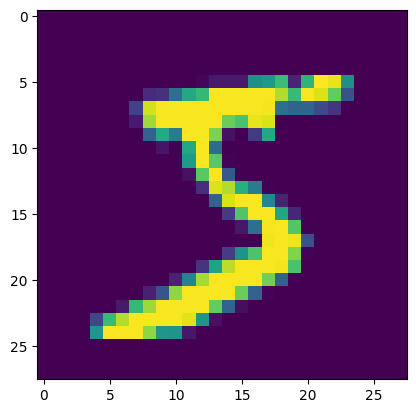

In [20]:
plt.imshow(image.reshape(28, 28))

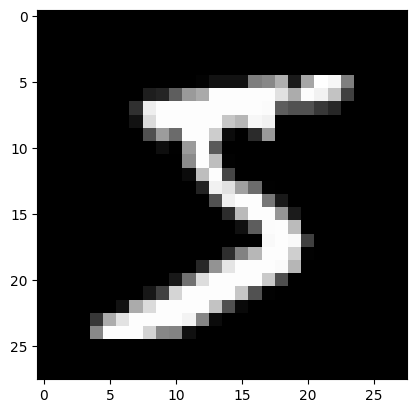

In [21]:
plt.imshow((image.reshape(28,28)) , cmap = 'gray')

In [22]:
torch.manual_seed(101)
train_loader = DataLoader(train_data , batch_size = 100 , shuffle = True)
# Batch size is number of training examples
test_loader = DataLoader(test_data , batch_size = 500 , shuffle = False)


In [23]:
from torchvision.utils import make_grid
np.set_printoptions(formatter = dict(int = lambda x: f'{x:4}')) 
 

In [24]:
for images ,labels in train_loader:
    break

In [25]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [26]:
image.shape

torch.Size([1, 28, 28])

In [27]:
torch.Size([100 , 1 ,28 ,28])

torch.Size([100, 1, 28, 28])

In [28]:
labels.shape

torch.Size([100])

In [29]:
print('Labels' , labels[:12].numpy())

Labels [   7    2    3    5    8    5    3    6    9    9    1    3]


In [30]:
# Print first 12 images

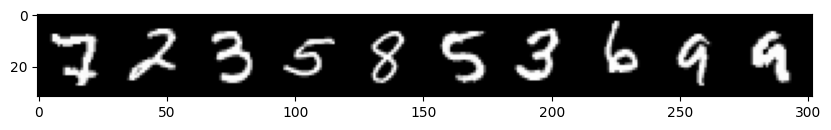

In [31]:
# Print first 12 labels
im = make_grid(images[:10] , nrow = 12)
# print first 12 images
plt.figure(figsize = (10,4))
plt.imshow(np.transpose(im.numpy() ,(1,2,0)))

In [32]:
# ANN with MNIST

In [33]:
class MultilayerPerceptron(nn.Module):
    def __init__(self , in_sz = 784 , out_sz = 10 , layers = [120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz , layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, x):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X) 

        return F.log_softmax(X, dim=1) # Multiclass Classification
    

In [34]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
# ANN---> CNN

In [36]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [37]:
images.shape

torch.Size([100, 1, 28, 28])

In [38]:
labels.shape

torch.Size([100])

In [39]:
# 105214 parameters

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)

In [41]:
images.shape

torch.Size([100, 1, 28, 28])

In [42]:
images.view(100 , -1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [43]:
#  Part 3 Training and Model Evaluation

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

# Hyperparameters
input_size = 784  # 28x28 flattened image size
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes
epochs = 5
batch_size = 64
learning_rate = 0.01

# Data loaders
transform = transforms.ToTensor()
train_loader = DataLoader(datasets.MNIST('.', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(datasets.MNIST('.', train=False, transform=transform), batch_size=batch_size, shuffle=False)

# Model, loss, and optimizer
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    train_loss = 0
    train_correct = 0

    model.train()
    for X_train, y_train in train_loader:
        # Flatten input
        X_train = X_train.view(X_train.size(0), -1)
        
        # Forward pass
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track accuracy and loss
        train_loss += loss.item()
        train_correct += (torch.max(y_pred, 1)[1] == y_train).sum().item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_correct/len(train_loader.dataset):.4f}")


Epoch 1/5, Loss: 0.2474, Accuracy: 0.9251
Epoch 2/5, Loss: 0.1464, Accuracy: 0.9571
Epoch 3/5, Loss: 0.1238, Accuracy: 0.9641
Epoch 4/5, Loss: 0.1215, Accuracy: 0.9674
Epoch 5/5, Loss: 0.1027, Accuracy: 0.9713


Epoch 1/5, Train Loss: 0.2464, Train Accuracy: 0.9254, Test Loss: 0.1645, Test Accuracy: 0.9498
Epoch 2/5, Train Loss: 0.1430, Train Accuracy: 0.9579, Test Loss: 0.1495, Test Accuracy: 0.9600
Epoch 3/5, Train Loss: 0.1231, Train Accuracy: 0.9655, Test Loss: 0.1574, Test Accuracy: 0.9566
Epoch 4/5, Train Loss: 0.1120, Train Accuracy: 0.9690, Test Loss: 0.1503, Test Accuracy: 0.9646
Epoch 5/5, Train Loss: 0.1015, Train Accuracy: 0.9719, Test Loss: 0.1366, Test Accuracy: 0.9668


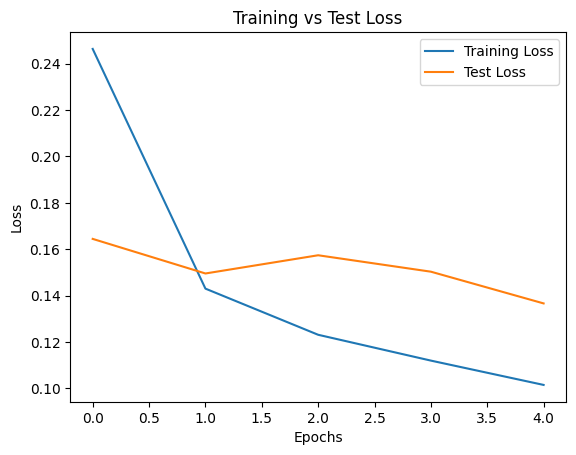

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

# Hyperparameters
input_size = 784  # 28x28 flattened image size
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes
epochs = 5
batch_size = 64
learning_rate = 0.01

# Data loaders
transform = transforms.ToTensor()
train_loader = DataLoader(datasets.MNIST('.', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(datasets.MNIST('.', train=False, transform=transform), batch_size=batch_size, shuffle=False)

# Model, loss, and optimizer
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Track losses
train_losses = []
test_losses = []

# Training and testing loop
for epoch in range(epochs):
    train_loss = 0
    train_correct = 0
    test_loss = 0
    test_correct = 0

    # Training Phase
    model.train()
    for X_train, y_train in train_loader:
        # Flatten input
        X_train = X_train.view(X_train.size(0), -1)
        
        # Forward pass
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track accuracy and loss
        train_loss += loss.item()
        train_correct += (torch.max(y_pred, 1)[1] == y_train).sum().item()
    
    # Test Phase
    model.eval()
    with torch.no_grad():
        for X_test, y_test in test_loader:
            # Flatten input
            X_test = X_test.view(X_test.size(0), -1)
            y_pred = model(X_test)
            loss = criterion(y_pred, y_test)
            test_loss += loss.item()
            test_correct += (torch.max(y_pred, 1)[1] == y_test).sum().item()
    
    # Average losses and accuracy
    avg_train_loss = train_loss / len(train_loader)
    avg_test_loss = test_loss / len(test_loader)
    train_accuracy = train_correct / len(train_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)

    # Store losses for plotting
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot Training and Test Loss
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Test Loss")
plt.show()


In [46]:
# Evaluation 

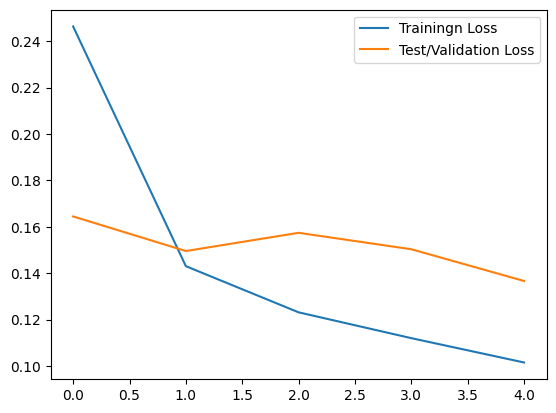

In [47]:
plt.plot(train_losses , label = "Trainingn Loss")
plt.plot(test_losses , label = "Test/Validation Loss")
plt.legend()

In [52]:
train_correct

58312

In [ ]:
# Accuracy

In [56]:
# train_acc = [ t/600 for t in train_correct]

In [57]:
# test_acc = [ t/600 for t in test_correct]

In [58]:
# plt.plot(train_acc , label = "train acc")
# plt.plot(test_acc , label = "test acc")
# plt.legend()

In [59]:
# NEW UNSEEN DATA
test_load = DataLoader(test_data , batch_size = 1000 , shuffle = False)

In [61]:
with torch.no_grad():
    correct = 0
    for X_test , y_test in test_data:
        y_val = model(X_test.view(len(X_test) , -1))
        predicted = torch.max(y_val.data, 1)[1]
        correct += (predicted == y_test).sum()




In [62]:
100*correct.item() / len(test_data)

96.68

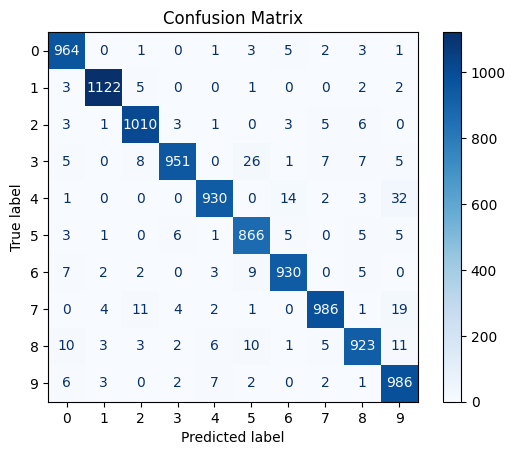

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model and collect predictions and actual labels
all_preds = []
all_targets = []

with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    for X_test, y_test in test_loader:
        X_test = X_test.view(X_test.size(0), -1)  # Flatten the images
        y_pred = model(X_test)
        predicted_labels = torch.max(y_pred, 1)[1]  # Get predicted labels
        all_preds.extend(predicted_labels.numpy())
        all_targets.extend(y_test.numpy())

# Convert predictions and actual labels to numpy arrays
all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_targets, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [69]:
# Image Filters and Kernels

In [70]:
# Computer Vision is to train images using different algorithms and algorithms that can produce different results                                                                                      

In [71]:
# Image filters are mathematical tools used for enhancing, detecting, or modifying features in images.
# Image Filters are matrices that apply blur , sharpen , outlining and embossing to images.

In [72]:
# Padding allows us to preserve iamge size

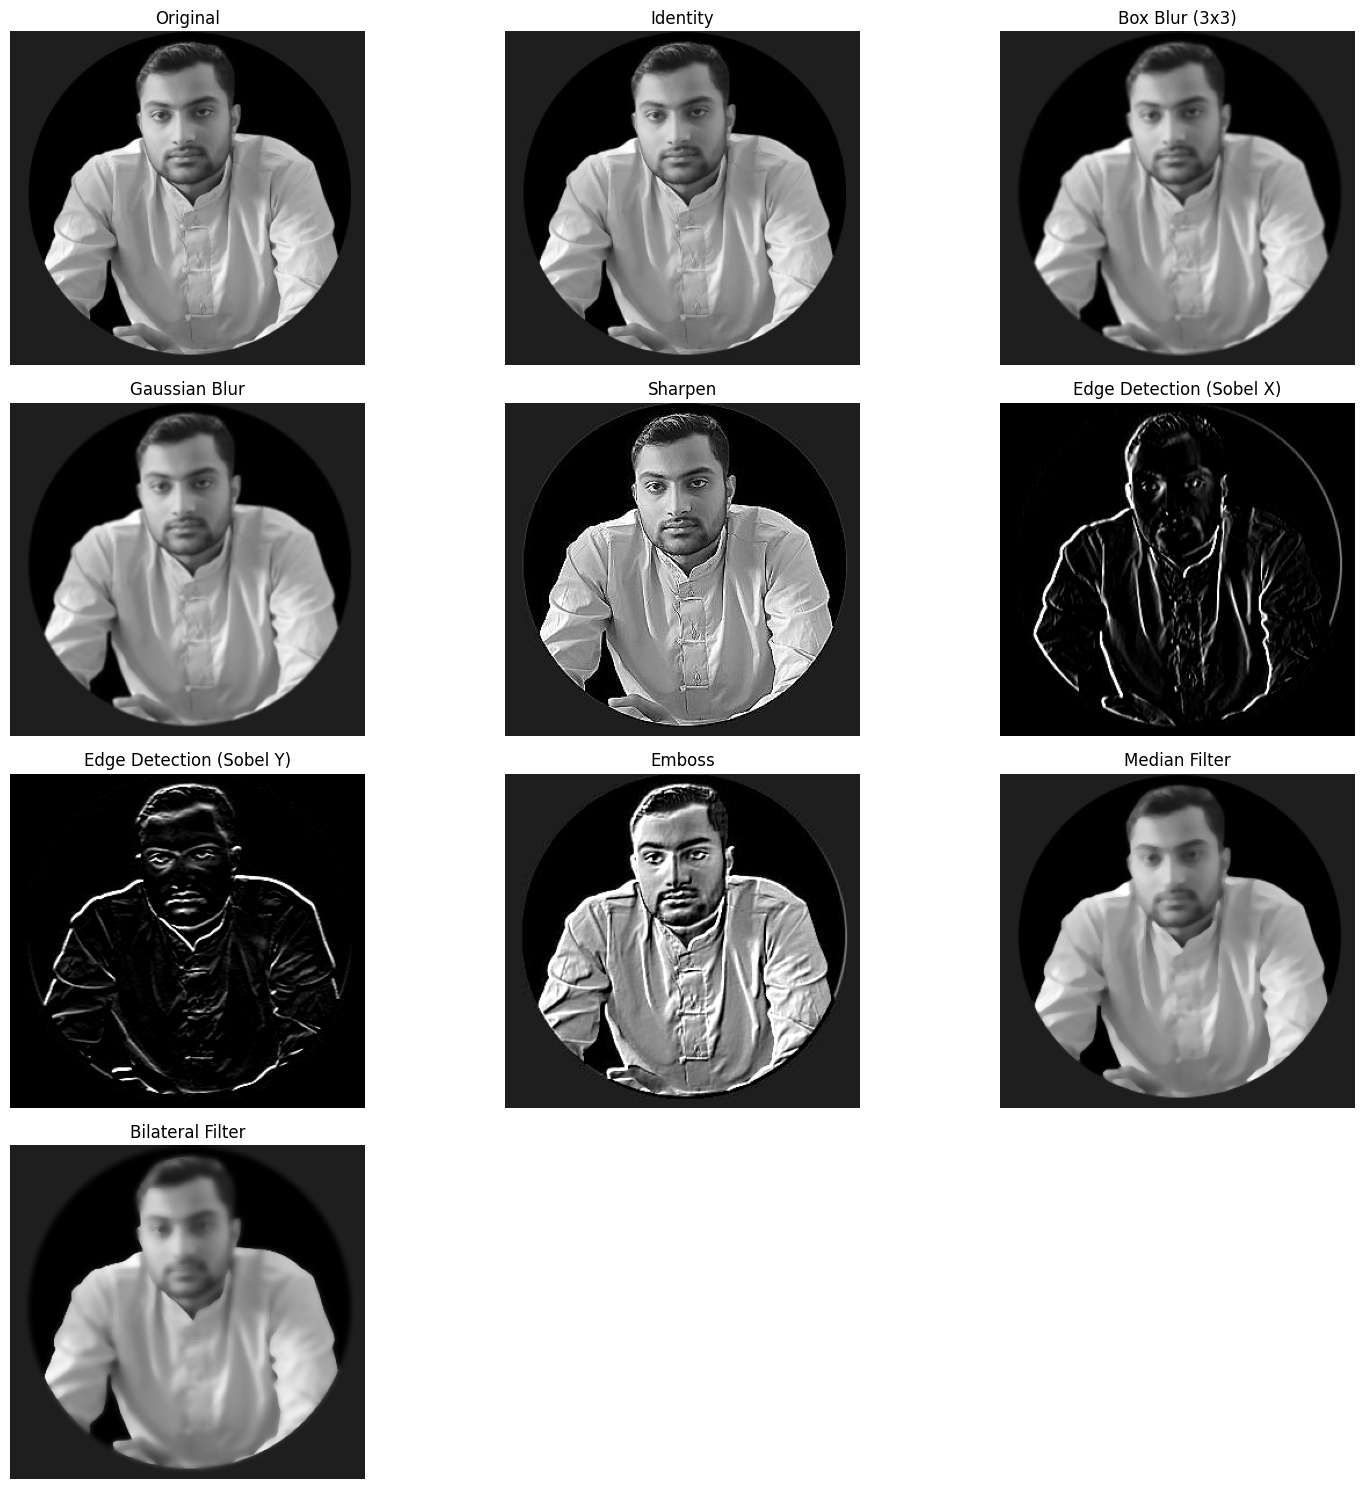

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r'D:\1\Pytorch\example.jpg', 0)  # Load as grayscale
if image is None:
    raise ValueError("Image not found! Please ensure 'example.jpg' exists in the same directory.")

# Define kernels for linear filters
kernels = {
    "Identity": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    "Box Blur (3x3)": np.ones((3, 3), dtype=np.float32) / 9,
    "Gaussian Blur": cv2.getGaussianKernel(3, 0) @ cv2.getGaussianKernel(3, 0).T,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Edge Detection (Sobel X)": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Edge Detection (Sobel Y)": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
}

# Apply linear filters
linear_results = {}
for name, kernel in kernels.items():
    filtered_image = cv2.filter2D(image, -1, kernel)
    linear_results[name] = filtered_image

# Apply non-linear filters
non_linear_results = {
    "Median Filter": cv2.medianBlur(image, 5),  # Kernel size 5x5
    "Bilateral Filter": cv2.bilateralFilter(image, 9, 75, 75),
}

# Plot the results
plt.figure(figsize=(15, 15))

# Original Image
plt.subplot(4, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

# Linear Filter Results
for i, (name, result) in enumerate(linear_results.items(), 2):
    plt.subplot(4, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

# Non-Linear Filter Results
for i, (name, result) in enumerate(non_linear_results.items(), len(linear_results) + 2):
    plt.subplot(4, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [75]:
# Convolutional Layers

In [76]:
# Flattening is loosing 2D information 

In [ ]:
# CNN reduce parameters on local connectivity
